In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


**Importing Face Mask Dataset**

In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls #To list my directories

data  face-mask-dataset.zip  kaggle.json  test1.jpg  test2.jpg	test3.jpg


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_33.jpg', 'with_mask_3669.jpg', 'with_mask_3059.jpg', 'with_mask_2950.jpg', 'with_mask_1187.jpg']
['with_mask_312.jpg', 'with_mask_3087.jpg', 'with_mask_2835.jpg', 'with_mask_568.jpg', 'with_mask_2171.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3325.jpg', 'without_mask_877.jpg', 'without_mask_672.jpg', 'without_mask_1853.jpg', 'without_mask_2742.jpg']
['without_mask_2925.jpg', 'without_mask_2233.jpg', 'without_mask_1473.jpg', 'without_mask_3354.jpg', 'without_mask_3479.jpg']


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


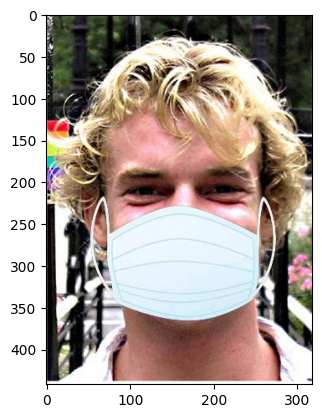

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1010.jpg')
imgplot = plt.imshow(img)
plt.show()

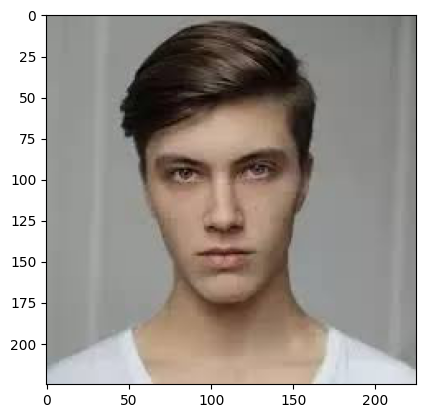

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1011.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1 Resize the images

2 Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
len(data[0])

128

In [ ]:
data[0]

array([[[169, 168, 182],
        [169, 169, 182],
        [168, 170, 183],
        ...,
        [ 83,  70,  80],
        [ 87,  76,  86],
        [ 91,  78,  88]],

       [[167, 166, 180],
        [167, 167, 180],
        [166, 168, 181],
        ...,
        [ 80,  66,  76],
        [ 83,  70,  80],
        [ 84,  71,  81]],

       [[163, 162, 176],
        [164, 163, 177],
        [164, 165, 178],
        ...,
        [ 77,  61,  72],
        [ 78,  64,  74],
        [ 77,  64,  74]],

       ...,

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [125,  97,  94],
        [128, 100,  97],
        [130, 102,  99]],

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [127,  99,  96],
        [129, 101,  98],
        [130, 102,  99]],

       [[182, 173, 168],
        [182, 173, 168],
        [181, 172, 167],
        ...,
        [128, 100,  97],
        [129, 101,  98],
        [130, 102,  98]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, T

In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[181, 167, 154],
        [182, 168, 155],
        [184, 170, 157],
        ...,
        [208, 206, 181],
        [202, 198, 169],
        [194, 189, 159]],

       [[181, 167, 154],
        [183, 169, 156],
        [184, 170, 157],
        ...,
        [208, 206, 181],
        [202, 198, 168],
        [194, 189, 159]],

       [[182, 168, 155],
        [183, 169, 156],
        [185, 171, 158],
        ...,
        [208, 206, 181],
        [201, 198, 168],
        [193, 188, 158]],

       ...,

       [[ 12,  16,  17],
        [  9,  14,  14],
        [  5,  12,  12],
        ...,
        [109, 121, 114],
        [133, 144, 135],
        [133, 147, 137]],

       [[ 11,  15,  16],
        [  8,  13,  14],
        [  4,  11,  10],
        ...,
        [111, 123, 115],
        [133, 145, 135],
        [133, 147, 137]],

       [[ 11,  15,  16],
        [  8,  13,  14],
        [  4,  11,  10],
        ...,
        [111, 123, 116],
        [133, 145, 135],
        [133, 147, 137]]

In [ ]:
X_train_scaled[0]

array([[[0.70980392, 0.65490196, 0.60392157],
        [0.71372549, 0.65882353, 0.60784314],
        [0.72156863, 0.66666667, 0.61568627],
        ...,
        [0.81568627, 0.80784314, 0.70980392],
        [0.79215686, 0.77647059, 0.6627451 ],
        [0.76078431, 0.74117647, 0.62352941]],

       [[0.70980392, 0.65490196, 0.60392157],
        [0.71764706, 0.6627451 , 0.61176471],
        [0.72156863, 0.66666667, 0.61568627],
        ...,
        [0.81568627, 0.80784314, 0.70980392],
        [0.79215686, 0.77647059, 0.65882353],
        [0.76078431, 0.74117647, 0.62352941]],

       [[0.71372549, 0.65882353, 0.60784314],
        [0.71764706, 0.6627451 , 0.61176471],
        [0.7254902 , 0.67058824, 0.61960784],
        ...,
        [0.81568627, 0.80784314, 0.70980392],
        [0.78823529, 0.77647059, 0.65882353],
        [0.75686275, 0.7372549 , 0.61960784]],

       ...,

       [[0.04705882, 0.0627451 , 0.06666667],
        [0.03529412, 0.05490196, 0.05490196],
        [0.01960784, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4295 - acc: 0.8187 - val_loss: 0.2869 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2837 - acc: 0.8865 - val_loss: 0.2606 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2245 - acc: 0.9169 - val_loss: 0.2337 - val_acc: 0.8992
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1694 - acc: 0.9365 - val_loss: 0.2251 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1541 - acc: 0.9393 - val_loss: 0.2277 - val_acc: 0.9207


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2018 - acc: 0.9252
Test Accuracy = 0.9252150654792786


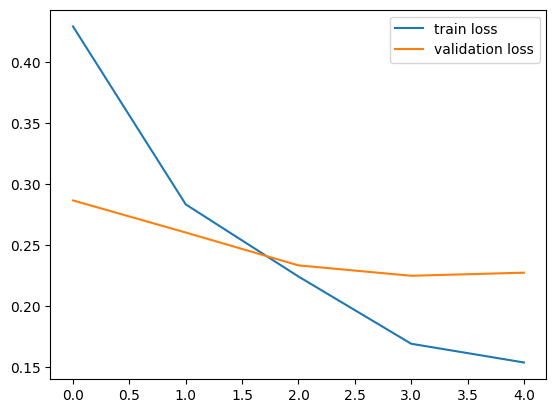

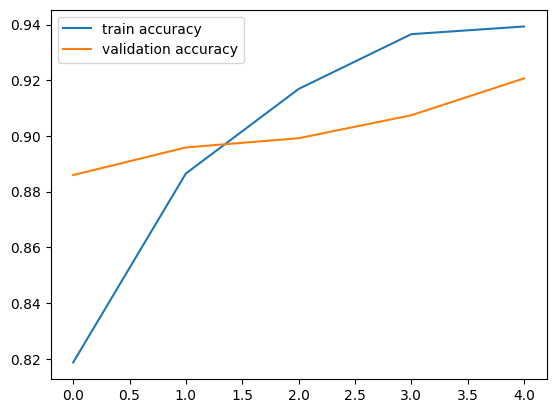

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test1.jpg


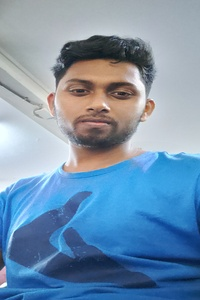

1/1 [==============================] - 0s 22ms/step
[[0.53967834 0.47461557]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test2.jpg


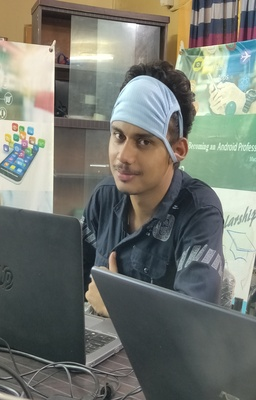

1/1 [==============================] - 0s 35ms/step
[[0.56730014 0.43392318]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test3.jpg


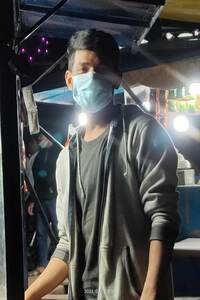

1/1 [==============================] - 0s 23ms/step
[[0.36075097 0.8246177 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')